Dataset: data.csv
Tasks to be performed:
1. Load the dataset using pandas
2. Extract data fromYearsExperience column is a variable named X
3. Extract data from salary column is a variable named Y
4. Divide the dataset into two parts for training and testing in 66% and 33% proportion
5. Create and train LinearRegression Model on training set
6. Make predictions based on the testing set using the trained model
7. Check the performance by calculating the r2 score of the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [2]:
#1. Load the dataset using pandas

linear=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\data.csv")

In [3]:
linear.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
linear.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
#2. Extract data fromYearsExperience column is a variable named X

X=linear['YearsExperience']
x=X.to_frame()

In [6]:
#3. Extract data from salary column is a variable named Y

Y=linear['Salary']
y=Y.to_frame()

In [7]:
#4. Divide the dataset into two parts for training and testing in 66% and 33% proportion

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [8]:
#5. Create and train LinearRegression Model on training set

from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [9]:
#6. Make predictions based on the testing set using the trained model

y_pred=l_model.predict(x_test)

In [10]:
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

In [11]:
error_pred=pd.DataFrame(columns={'Actual_data','Prediciton_data'})

In [12]:
error_pred['Actual_data']=y_test

In [13]:
error_pred['Prediction_data']=y_pred

In [14]:
error_pred

,Actual_data,Prediciton_data,Prediction_data
2,37731.0,NaN,40835.105909
28,122391.0,NaN,123079.399408
13,57081.0,NaN,65134.556261
10,63218.0,NaN,63265.367772
26,116969.0,NaN,115602.645454
24,109431.0,NaN,108125.891499
27,112635.0,NaN,116537.239698
11,55794.0,NaN,64199.962017
17,83088.0,NaN,76349.687193
22,101302.0,NaN,100649.137545


In [15]:
error_pred.shape

(10, 3)

In [16]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [17]:
error_pred['Error']

2    -3104.105909
28    -688.399408
13   -8053.556261
10     -47.367772
26    1366.354546
24    1305.108501
27   -3902.239698
11   -8405.962017
17    6738.312807
22     652.862455
Name: Error, dtype: float64

In [18]:
error_pred.head()

,Actual_data,Prediciton_data,Prediction_data,Error
2,37731.0,NaN,40835.105909,-3104.105909
28,122391.0,NaN,123079.399408,-688.399408
13,57081.0,NaN,65134.556261,-8053.556261
10,63218.0,NaN,63265.367772,-47.367772
26,116969.0,NaN,115602.645454,1366.354546


In [19]:
#7. Check the performance by calculating the r2 score of the model

r2_on_test=r2_score(y_test,y_pred)   
r2_on_test

0.9749154407708353


The result 0.97 shows that there is a strong linear relationship between X and Y. So we can use for future predictions.


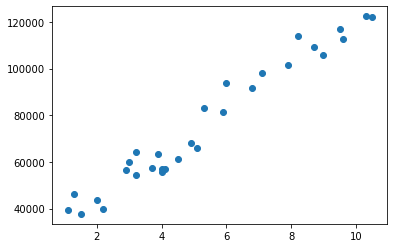

In [20]:
X=linear['YearsExperience']
Y=linear['Salary']
plt.scatter(X,Y)
plt.show()

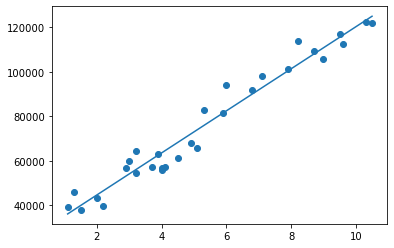

In [21]:
import matplotlib.pyplot as plt
from scipy import stats


X=linear['YearsExperience']
Y=linear['Salary']


slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.show()

In [22]:
print(r)

0.9782416184887599


In [23]:
exp_sal=myfunc(11.5)
exp_sal

134466.76689540208

In [24]:
expabv5_salabv60k=linear[(linear['YearsExperience']>5) & (linear['Salary']>60000)]

In [25]:
expabv5_salabv60k.value_counts().sum()

14

In [26]:
sal50_80=linear[(linear['Salary']>50000) & (linear['Salary']< 80000)]

In [27]:
sal50_80.value_counts().sum()

12

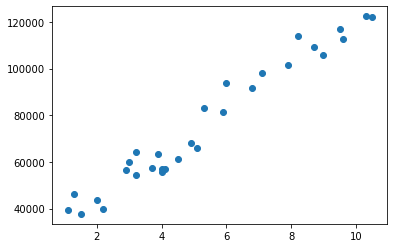

In [28]:
X=linear['YearsExperience']
Y=linear['Salary']
plt.scatter(X,Y)
plt.show()

In [29]:
linear.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

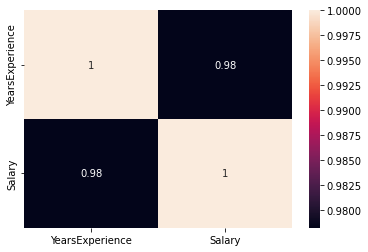

In [30]:
import seaborn as sns
sns.heatmap(linear.corr(),annot=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

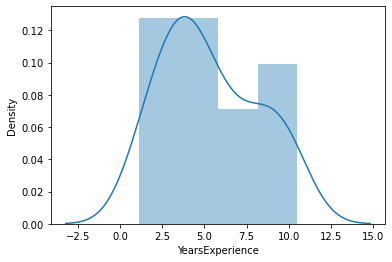

In [31]:
sns.distplot(X)

In [32]:
linear.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [33]:
#Divide the dataset into two parts for training and testing in 60% and 40% proportion

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=0)
l_model_1=LinearRegression()
l_model_1.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred1=l_model_1.predict(x_test)

In [35]:
y_pred1

array([[ 40950.03066143],
       [123734.76796394],
       [ 65409.15759172],
       [ 63527.68628939],
       [116208.88275462],
       [108682.9975453 ],
       [117149.61840578],
       [ 64468.42194055],
       [ 76697.98540569],
       [101157.11233598],
       [ 54120.32977774],
       [ 74816.51410337]])

In [36]:
r2_on_test=r2_score(y_test,y_pred1)   
r2_on_test

0.9679117063698979

In [37]:
print(r)

0.9782416184887599
